In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/custom-test/1.jpg
/kaggle/input/custom-test/2.jpg


#Data source: https://universe.roboflow.com/iotseecs/brain-tumor-yzzav/dataset/1

In [4]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 8.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 10.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. Th

In [5]:
!nvidia-smi

Fri Jan 30 05:07:36 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.105.08             Driver Version: 580.105.08     CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P0             25W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
from ultralytics import YOLO
from roboflow import Roboflow
rf = Roboflow(api_key="nXRFu1swQzbMlfRMolSH")
project = rf.workspace("mike-cox-szip2").project("brain-tumor-omjcy")
version = project.version(3)
dataset = version.download("yolov11")
                

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Brain-Tumor-3 in yolov11:: 100%|██████████| 8834/8834 [00:00<00:00, 9073.94it/s] 


#Yaml edit

In [7]:
#config
import yaml

yaml_path = "/kaggle/working/Brain-Tumor-3/data.yaml"   # or config.yml

with open(yaml_path, "r") as f:
    data = yaml.safe_load(f)

print(data)


data["path"] = "/kaggle/working/Brain-Tumor-3"

# optional but recommended
data["train"] = "/kaggle/working/Brain-Tumor-3/train/images"
data["val"] = "/kaggle/working/Brain-Tumor-3/valid/images"
data["test"]= "/kaggle/working/Brain-Tumor-3/test/images"

with open(yaml_path, "w") as f:
    yaml.dump(data, f, sort_keys=False)

print("YAML updated for Kaggle ✅")

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 5, 'names': ['Brain-With-Meningioma-Tumour', 'Brain-With-Pituitary-Tumour', 'Brain-With-Tumour', 'Healthy Brain', 'Tumor'], 'roboflow': {'workspace': 'mike-cox-szip2', 'project': 'brain-tumor-omjcy', 'version': 3, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/mike-cox-szip2/brain-tumor-omjcy/dataset/3'}}
YAML updated for Kaggle ✅


In [8]:
!cat /kaggle/working/Brain-Tumor-3/data.yaml

train: /kaggle/working/Brain-Tumor-3/train/images
val: /kaggle/working/Brain-Tumor-3/valid/images
test: /kaggle/working/Brain-Tumor-3/test/images
nc: 5
names:
- Brain-With-Meningioma-Tumour
- Brain-With-Pituitary-Tumour
- Brain-With-Tumour
- Healthy Brain
- Tumor
roboflow:
  workspace: mike-cox-szip2
  project: brain-tumor-omjcy
  version: 3
  license: CC BY 4.0
  url: https://universe.roboflow.com/mike-cox-szip2/brain-tumor-omjcy/dataset/3
path: /kaggle/working/Brain-Tumor-3


#Load and train the model

In [10]:
# Load a model
model = YOLO("yolo11n.pt")

# Train the model
train_results = model.train(
    data="/kaggle/working/Brain-Tumor-3/data.yaml",  # path to dataset YAML
    epochs=10,  # number of training epochs
    imgsz=640,  # training image size
    device=0,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu as  0 consider 1st GPU
)

Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Brain-Tumor-3/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience

#Graphs and visualization

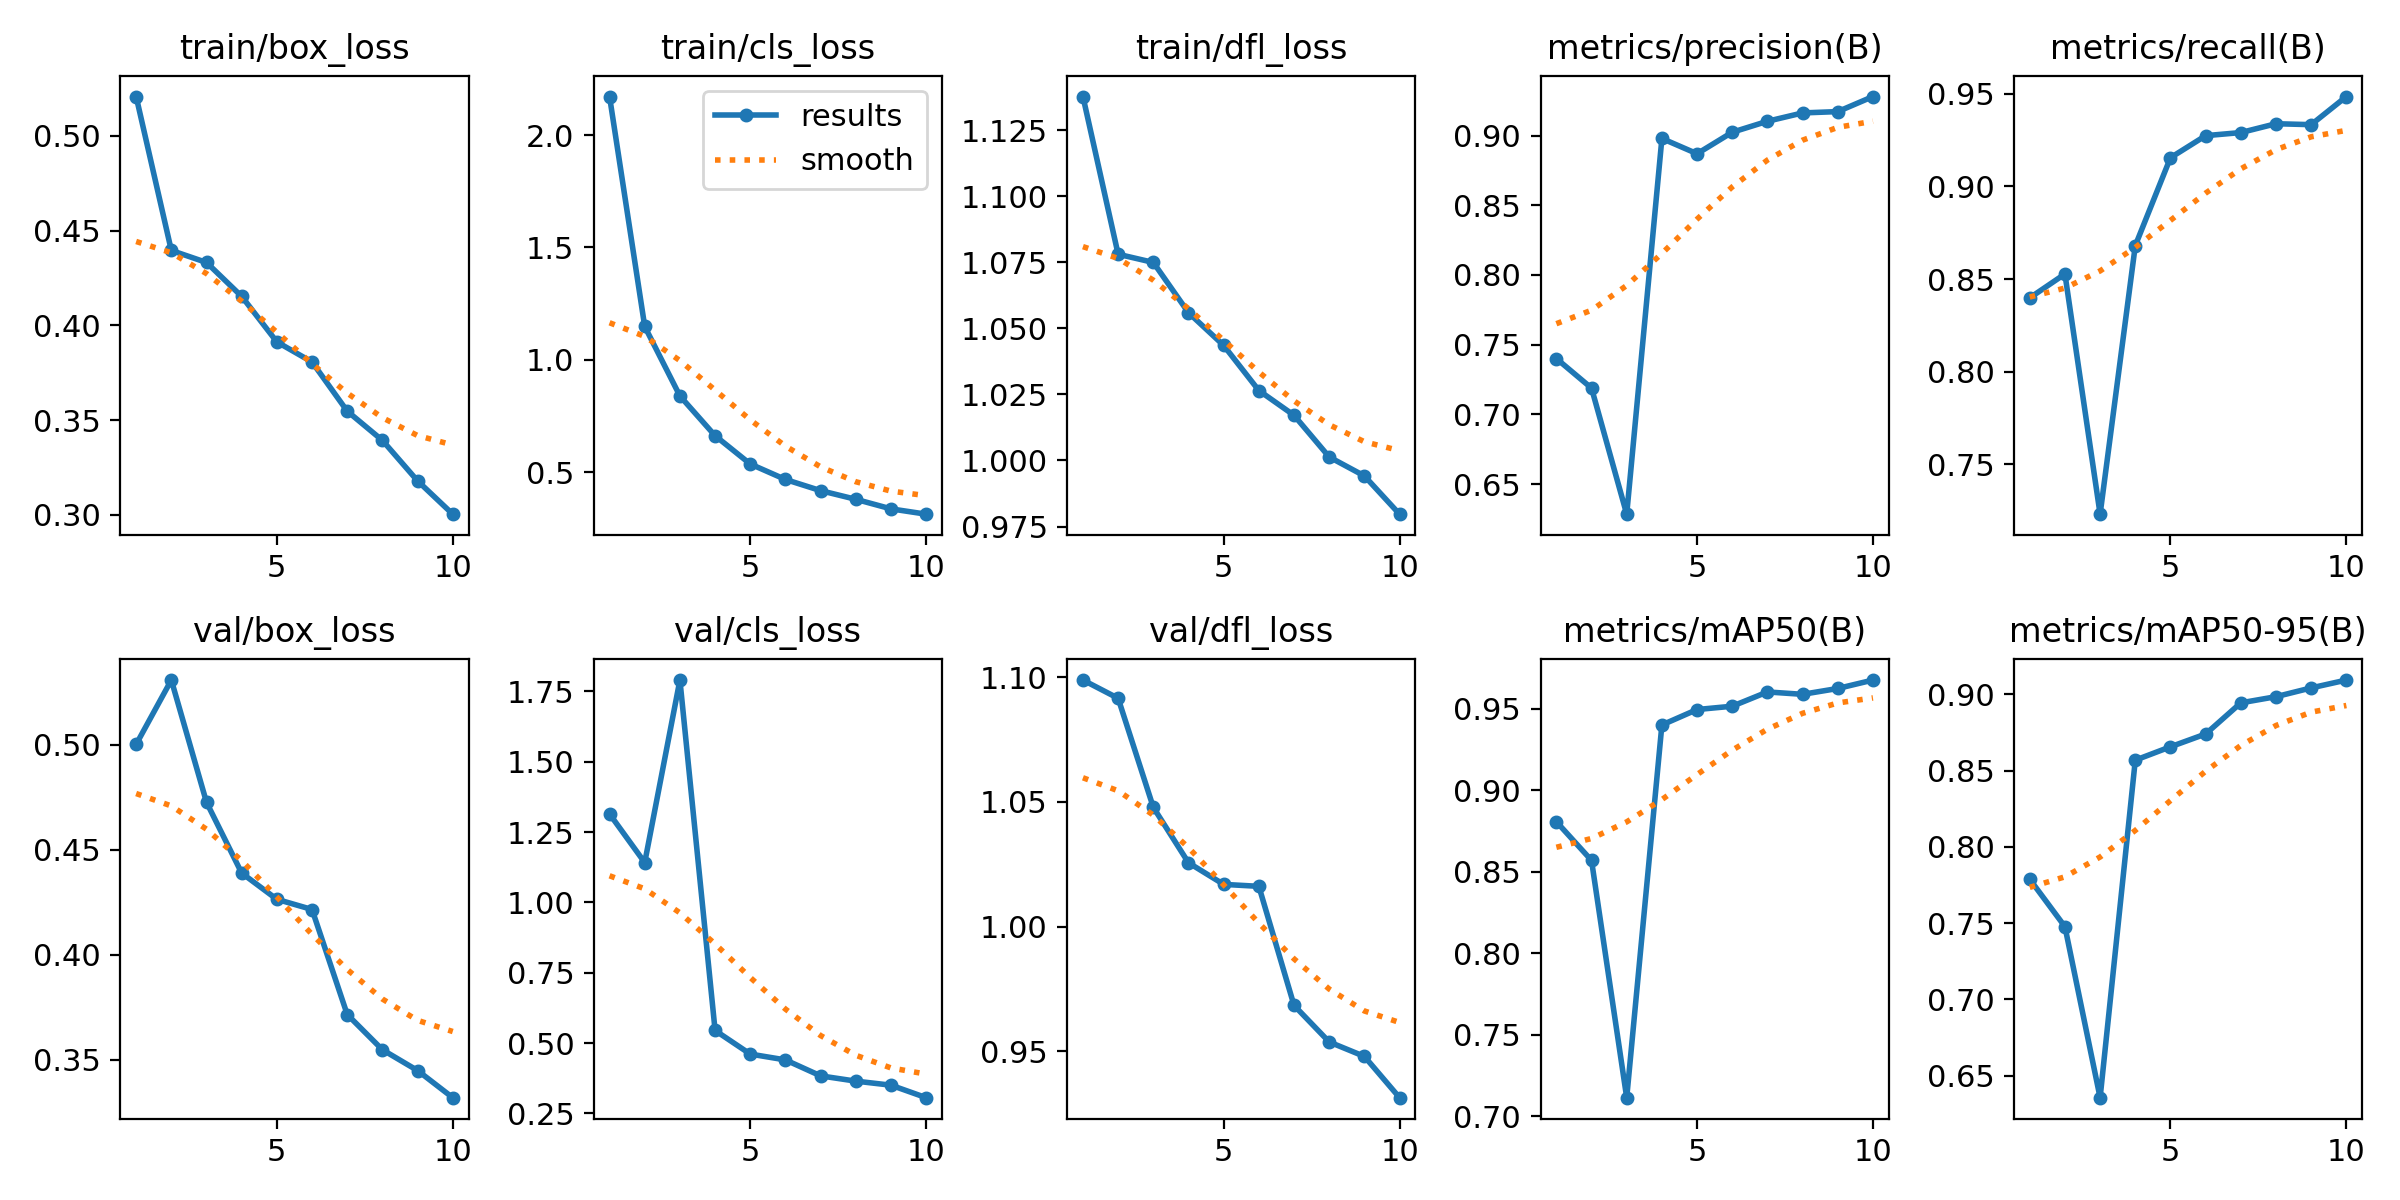

In [14]:
from IPython.display import Image

Image("/kaggle/working/runs/detect/train/results.png", width=600)


image 1/1 /kaggle/input/custom-test/1.jpg: 640x640 1 Brain-With-Meningioma-Tumour, 1 Tumor, 8.6ms
Speed: 5.5ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /kaggle/working/runs/detect/predict


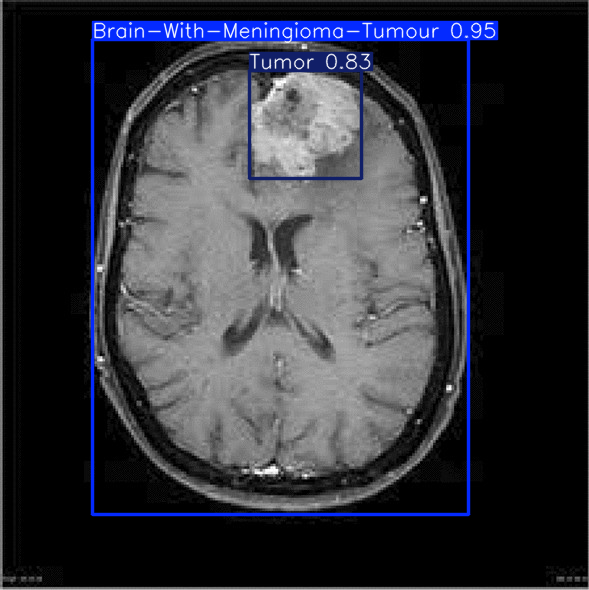

In [15]:
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
results = model("/kaggle/input/custom-test/1.jpg", save=True)
results[0].show()


image 1/1 /kaggle/input/custom-test/2.jpg: 640x576 1 Brain-With-Meningioma-Tumour, 1 Tumor, 52.2ms
Speed: 2.1ms preprocess, 52.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)
Results saved to /kaggle/working/runs/detect/predict2


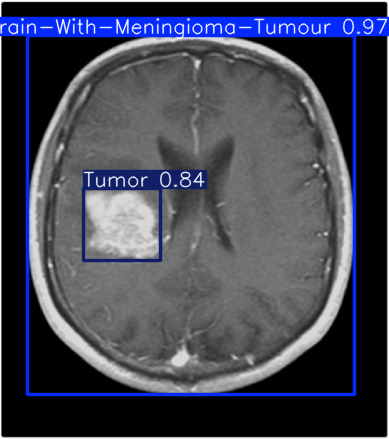

In [17]:
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
results = model("/kaggle/input/custom-test/2.jpg", save=True)
results[0].show()

#sam2 segmentation  anotate

In [18]:
# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    print(boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 4.], device='cuda:0')
conf: tensor([0.9690, 0.8360], device='cuda:0')
data: tensor([[ 27.9525,  35.5636, 354.6192, 394.6261,   0.9690,   0.0000],
        [ 83.7426, 188.4775, 160.7024, 260.9720,   0.8360,   4.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (439, 389)
shape: torch.Size([2, 6])
xywh: tensor([[191.2859, 215.0948, 326.6667, 359.0625],
        [122.2225, 224.7248,  76.9598,  72.4945]], device='cuda:0')
xywhn: tensor([[0.4917, 0.4900, 0.8398, 0.8179],
        [0.3142, 0.5119, 0.1978, 0.1651]], device='cuda:0')
xyxy: tensor([[ 27.9525,  35.5636, 354.6192, 394.6261],
        [ 83.7426, 188.4775, 160.7024, 260.9720]], device='cuda:0')
xyxyn: tensor([[0.0719, 0.0810, 0.9116, 0.8989],
        [0.2153, 0.4293, 0.4131, 0.5945]], device='cuda:0')


In [19]:
from ultralytics import YOLO
from ultralytics import SAM

# Load the YOLO model
yolo_model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")  # pretrained YOLO model

# Run batched inference on a list of images
results = yolo_model("/kaggle/input/custom-test/2.jpg")  # return a list of Results objects

# Load the SAM model
sam_model = SAM("sam2_b.pt")#sam base model

for result in results:
     class_ids = result.boxes.cls.int().tolist()  # noqa
     if len(class_ids):
         boxes = result.boxes.xyxy  # Boxes object for bbox outputs
         sam_results = sam_model(result.orig_img, bboxes=boxes, verbose=False, save=True, device=0)


image 1/1 /kaggle/input/custom-test/2.jpg: 640x576 1 Brain-With-Meningioma-Tumour, 1 Tumor, 10.8ms
Speed: 2.5ms preprocess, 10.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)
Results saved to /kaggle/working/runs/segment/predict


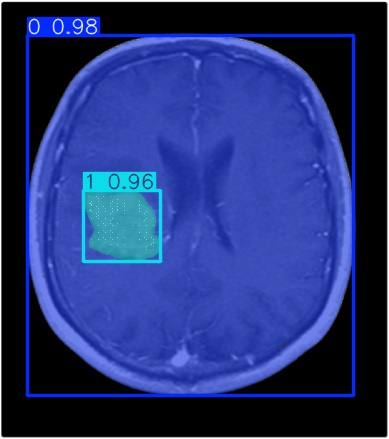

In [22]:
Image("/kaggle/working/runs/segment/predict/image0.jpg", width=600)

#Instead of using yolo11n and then sam2 use yolo11n-seg it will automatically mask and show segmentation in results